In [266]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt

In [268]:
df=pd.read_csv('clean_data.csv',index_col=[0])

In [269]:
df.head()

,Name,Age,Overall,Potential,Preferred Foot,Weak Foot,Skill Moves,Work Rate,Position,Height,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,94,94,Left,4.0,4.0,Medium/ Medium,RF,5.70,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,Cristiano Ronaldo,33,94,94,Right,4.0,5.0,High/ Low,ST,6.20,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,Neymar Jr,26,92,93,Right,5.0,5.0,High/ Medium,LW,5.90,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
3,De Gea,27,91,93,Right,3.0,1.0,Medium/ Medium,GK,6.40,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
4,K. De Bruyne,27,91,92,Right,5.0,4.0,High/ High,RCM,5.11,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4


player positions we have

In [270]:
print('player positons :',df['Position'].unique())

player positons : ['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'LAM' 'RWB'
 'LWB']


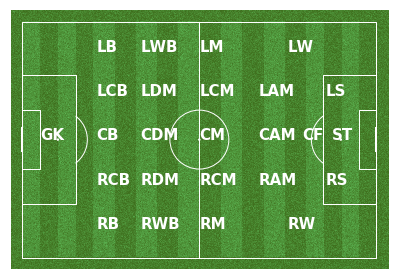

In [271]:
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True,linewidth = 1)
fig, ax = pitch.draw()
ax.text(6,40,'GK',color='white',fontweight='extra bold',fontsize=15)

ax.text(25,40,'CB',color='white',fontweight='extra bold',fontsize=15)

ax.text(25,55,'RCB',color='white',fontweight='extra bold',fontsize=15)
ax.text(25,25,'LCB',color='white',fontweight='extra bold',fontsize=15)

ax.text(25,10,'LB',color='white',fontweight='extra bold',fontsize=15)
ax.text(25,70,'RB',color='white',fontweight='extra bold',fontsize=15)

ax.text(40,70,'RWB',color='white',fontweight='extra bold',fontsize=15)
ax.text(40,10,'LWB',color='white',fontweight='extra bold',fontsize=15)

ax.text(40,40,'CDM',color='white',fontweight='extra bold',fontsize=15)
ax.text(40,55,'RDM',color='white',fontweight='extra bold',fontsize=15)
ax.text(40,25,'LDM',color='white',fontweight='extra bold',fontsize=15)

ax.text(60,40,'CM',color='white',fontweight='extra bold',fontsize=15)
ax.text(60,25,'LCM',color='white',fontweight='extra bold',fontsize=15)
ax.text(60,55,'RCM',color='white',fontweight='extra bold',fontsize=15)
ax.text(60,10,'LM',color='white',fontweight='extra bold',fontsize=15)
ax.text(60,70,'RM',color='white',fontweight='extra bold',fontsize=15)

ax.text(80,40,'CAM',color='white',fontweight='extra bold',fontsize=15)
ax.text(80,25,'LAM',color='white',fontweight='extra bold',fontsize=15)
ax.text(80,55,'RAM',color='white',fontweight='extra bold',fontsize=15)
ax.text(90,70,'RW',color='white',fontweight='extra bold',fontsize=15)
ax.text(90,10,'LW',color='white',fontweight='extra bold',fontsize=15)

ax.text(103,25,'LS',color='white',fontweight='extra bold',fontsize=15)
ax.text(103,55,'RS',color='white',fontweight='extra bold',fontsize=15)
ax.text(105,40,'ST',color='white',fontweight='extra bold',fontsize=15)
ax.text(95,40,'CF',color='white',fontweight='extra bold',fontsize=15)

plt.show()

lets see who is the best player for each position

In [272]:
index_values_best = df.groupby('Position')['Overall'].idxmax().values

In [288]:
best_player_per_position = df.loc[index_values_best,['Name','Overall','Position','Age','Release Clause']].sort_values(by='Overall',ascending=False)
best_player_per_position.head()

,Name,Overall,Position,Age,Release Clause
1,Cristiano Ronaldo,94,ST,33,127.1
0,L. Messi,94,RF,31,226.5
2,Neymar Jr,92,LW,26,228.1
5,E. Hazard,91,LF,27,172.1
7,L. Suárez,91,RS,31,164.0


lets see the teenagers who have the most potential

In [289]:
index_values_young = (df[df.Age<21]).groupby('Position')['Potential'].idxmax().values
young_player_per_position = df.loc[index_values_young,['Name','Potential','Position','Age','Release Clause']].sort_values(by='Potential',ascending=False)
young_player_per_position.head()

,Name,Potential,Position,Age,Release Clause
25,K. Mbappé,95,RM,19,166.1
229,G. Donnarumma,93,GK,19,55.1
1143,Vinícius Júnior,92,LW,17,46.8
226,M. de Ligt,91,RCB,18,43.2
415,H. Aouar,90,LM,20,49.4


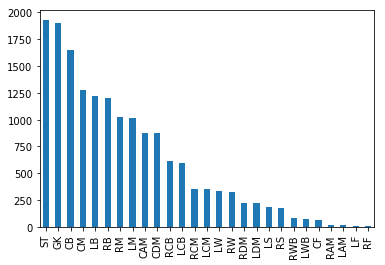

In [290]:
#plotting no of player for each position
df['Position'].value_counts().plot(kind = 'bar')

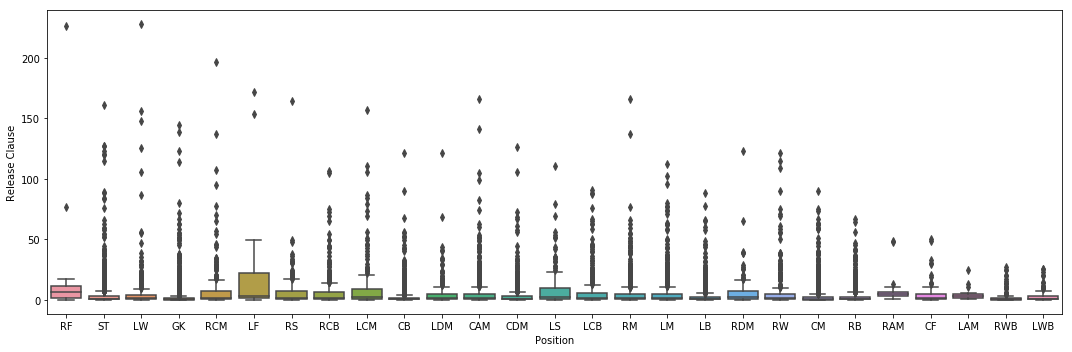

In [308]:
#lets see if there is a relation b/w player price and overall
plt.figure(figsize = (15,5))
sns.boxplot(y = df['Release Clause'] ,x=df['Position'])
plt.tight_layout()


we don't see any patterns as such lets group together the data and see if it helps in any way


In [309]:
#defining a fucntion to change cell values as per the need
def change_categories(cell_value):
    attackers = ['ST','LW','RW','LS','RS','CF','RF','LF']
    midfielders = ['CM','RM','LM','CAM','CDM','LCM','RCM','RDM','LDM','RAM','LAM']
    defenders = ['CB','LB','RB','RCB','LCB','RWB','LWB']
    goalkeepers = ['GK']
    if cell_value in attackers:
        return 'Attacker'
    
    if cell_value in midfielders:
        return 'Midfielder'
    
    if cell_value in defenders:
        return 'Defender'
        
    if cell_value in goalkeepers:
        return 'Goalkeeper'
df['Position']=df['Position'].apply(lambda x : change_categories(x))

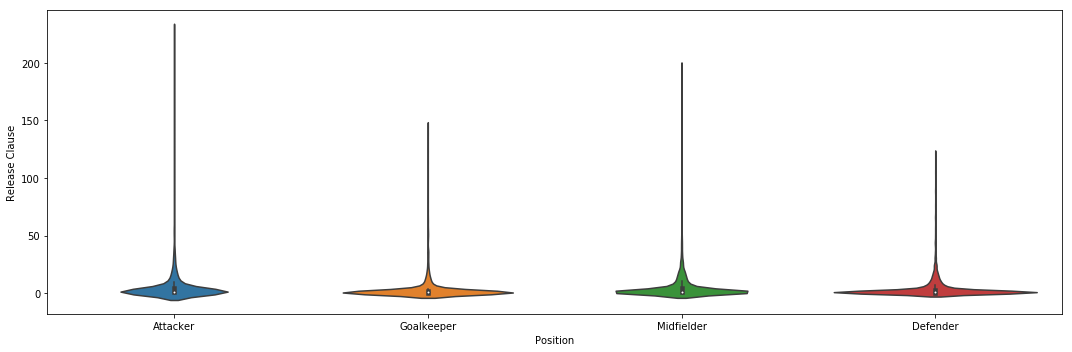

In [313]:
plt.figure(figsize = (15,5))
sns.violinplot(y = df['Release Clause'] ,x=df['Position'])
plt.tight_layout()

only thing we can notice is that mean release clauses meander around the same range, but only the variation is most across attackers

# I aim to create models one predicting the the most  probable position for player and depending on his attributes and also his release clause